In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import BernoulliRBM

def load_mnist_digit(digit, dataset_size):
    assert(digit >= 0 and digit < 10)
    with open("datasets/{}.npy".format(digit),'rb') as f:
        return np.load(f)[:dataset_size]
    
def flatten_dataset(images):
    smushed = images.copy()
    return smushed.reshape((smushed.shape[0], -1))

The shape of the dataset returned is (size, 28, 28): (200, 28, 28)


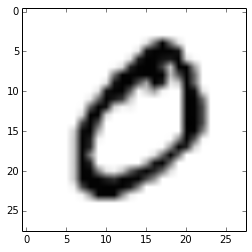

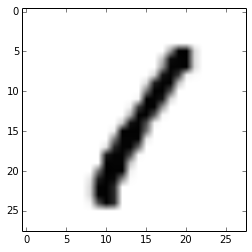

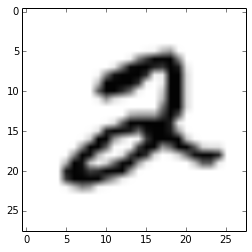

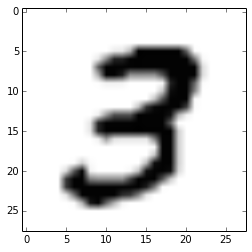

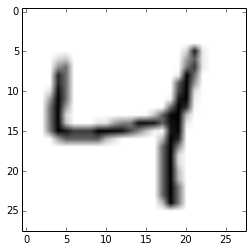

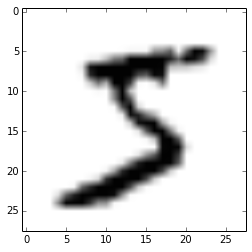

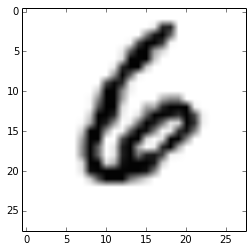

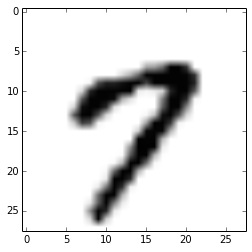

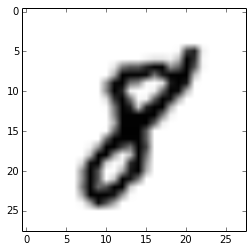

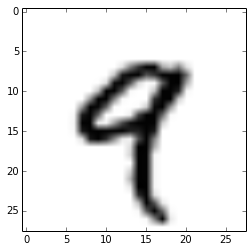

In [2]:
print("The shape of the dataset returned is (size, 28, 28): {}".format(load_mnist_digit(2, 200).shape))
for i in range(10):
    plt.imshow(load_mnist_digit(i,1)[0], cmap="Greys")
    plt.show()


In [7]:
dataset_size = 200
current_digits = flatten_dataset(load_mnist_digit(1,dataset_size))
for i in range(1,10):
    current_digits = np.vstack((current_digits, flatten_dataset(load_mnist_digit(i,dataset_size))))
    

In [8]:
num_hidden = 300
learning_rate = 0.002
iterations = 1000

digit_RBM = BernoulliRBM(n_components=num_hidden, n_iter= iterations , learning_rate= learning_rate, batch_size= dataset_size)

In [9]:
help(digit_RBM.fit)

Help on method fit in module sklearn.neural_network.rbm:

fit(X, y=None) method of sklearn.neural_network.rbm.BernoulliRBM instance
    Fit the model to the data X.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} shape (n_samples, n_features)
        Training data.
    
    Returns
    -------
    self : BernoulliRBM
        The fitted model.



In [10]:
digit_RBM.fit(current_digits)

BernoulliRBM(batch_size=200, learning_rate=0.002, n_components=300,
       n_iter=1000, random_state=None, verbose=0)

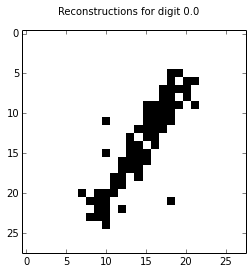

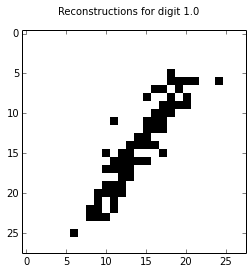

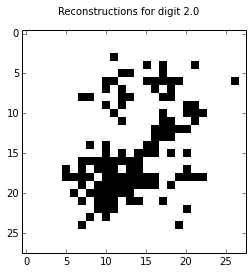

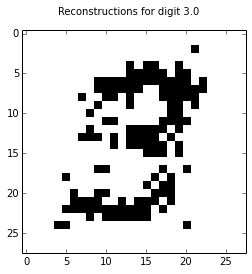

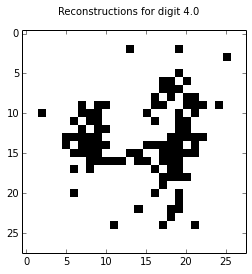

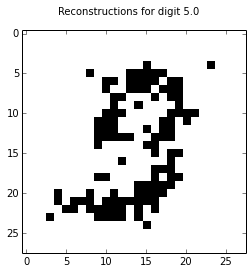

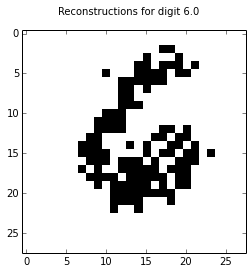

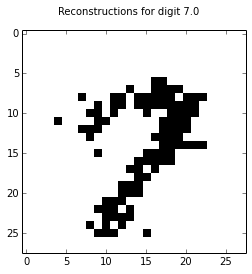

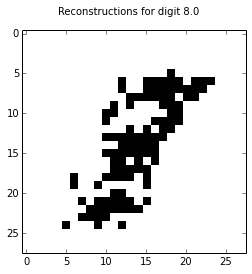

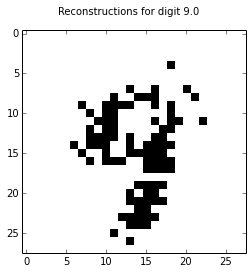

In [12]:
# reconstructions look a bit average :/,
for i in range(0,current_digits.shape[0],200):
    plt.suptitle("Reconstructions for digit {}".format(i/200))
    plt.imshow(np.where(digit_RBM.gibbs(current_digits[i]),1,0).reshape(28,28), cmap="Greys", interpolation='nearest')
    plt.show()

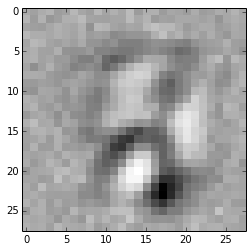

In [14]:
# lets have a look at the weights into a hidden, don't think there are sparsity stuff going on here.
hidden_unit_of_interest = 0
plt.imshow(digit_RBM.components_.reshape(300, 28,28)[hidden_unit_of_interest], cmap="Greys", interpolation='nearest')